In [1]:
# imports
from money_model import MoneyModel
from util import *
from mesa.batchrunner import BatchRunner
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = MoneyModel(50, 10, 10)
for i in range(20):
    model.step()

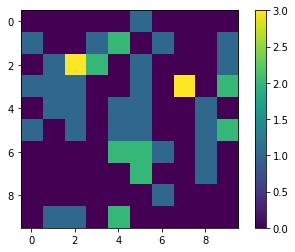

In [3]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar()

(array([27., 11.,  0.,  6.,  0.,  2.,  1.,  0.,  1.,  2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

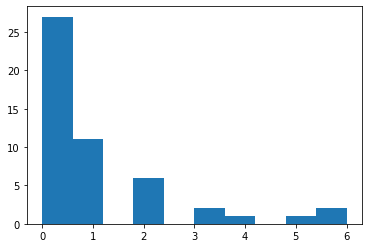

In [4]:
agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

In [5]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

<AxesSubplot:>

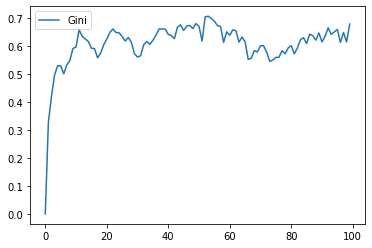

In [6]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [7]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

<AxesSubplot:>

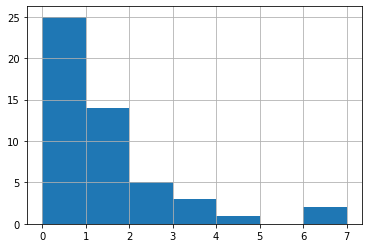

In [8]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max() + 1))

<AxesSubplot:xlabel='Step'>

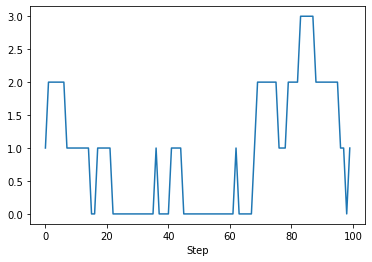

In [9]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

In [10]:
fixed_params = {"width": 10, "height": 10}
variable_params = {"N": range(10, 500, 10)}
batch_run = BatchRunner(MoneyModel,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=100,
                        model_reporters={"Gini": compute_gini})

batch_run.run_all()

245it [00:55,  4.39it/s]


In [11]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()

,N,Run,Gini,width,height
0,10,0,0.58,10,10
1,10,1,0.46,10,10
2,10,2,0.48,10,10
3,10,3,0.58,10,10
4,10,4,0.64,10,10


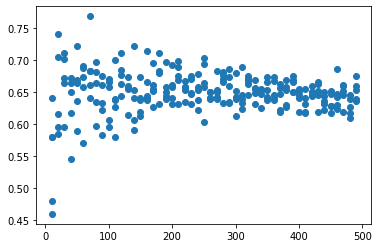

In [12]:
plt.scatter(run_data.N, run_data.Gini)

In [13]:
data_collector_agents = batch_run.get_collector_agents()
data_collector_agents[(10,2)]

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
...              ...
99   5             3
     6             1
     7             2
     8             0
     9             1

[1000 rows x 1 columns]

In [14]:
data_collector_model = batch_run.get_collector_model()
data_collector_model[(10,1)]

,Gini
0,0.00
1,0.18
2,0.18
3,0.18
4,0.18
...,...
95,0.46
96,0.46
97,0.46
98,0.46
